In [1]:
import cv2

In [2]:
from deepface import DeepFace

In [3]:
img=cv2.imread('download.jpeg')

In [4]:
import matplotlib.pyplot as plt

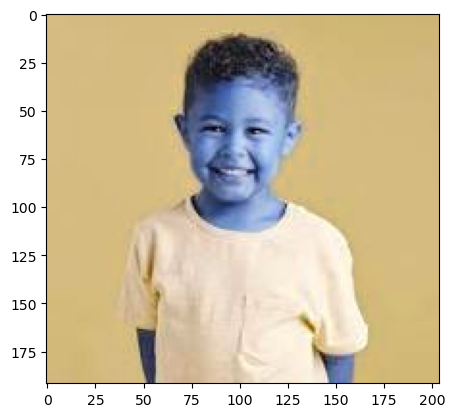

In [5]:
plt.imshow(img)

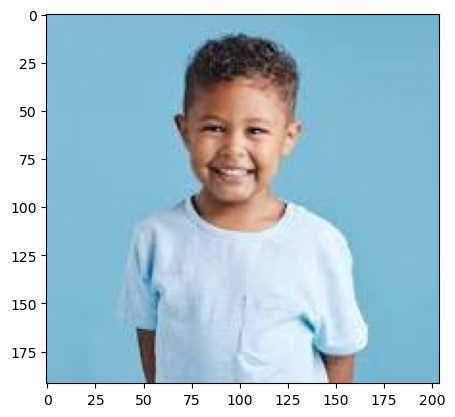

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
predictions=DeepFace.analyze(img)

Action: race: 100%|████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:41<00:00, 10.37s/it]


In [8]:
predictions


[{'emotion': {'angry': 0.0001682383285930583,
   'disgust': 4.4809696404193585e-07,
   'fear': 0.0027934482050763305,
   'happy': 99.96037482979148,
   'sad': 4.82955585222023e-05,
   'surprise': 0.0006577161394526092,
   'neutral': 0.035962371436498844},
  'dominant_emotion': 'happy',
  'region': {'x': 68,
   'y': 36,
   'w': 61,
   'h': 61,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.94,
  'age': 23,
  'gender': {'Woman': 4.356824606657028, 'Man': 95.64318060874939},
  'dominant_gender': 'Man',
  'race': {'asian': 16.393180191516876,
   'indian': 10.531703382730484,
   'black': 55.77264428138733,
   'white': 1.8173454329371452,
   'middle eastern': 1.282245572656393,
   'latino hispanic': 14.202885329723358},
  'dominant_race': 'black'}]

In [9]:
type(predictions)

list

In [10]:
predictions = DeepFace.analyze(img)
prediction_dict = predictions[0]  # Access the first dictionary from the list

# Example of how to extract values from the dictionary:
dominant_emotion = prediction_dict['dominant_emotion']
age = prediction_dict['age']
dominant_gender = prediction_dict['dominant_gender']
dominant_race = prediction_dict['dominant_race']

print(dominant_emotion, age, dominant_gender, dominant_race)


Action: race: 100%|████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.58s/it]

happy 23 Man black


In [11]:
prediction_dict['dominant_emotion']

'happy'

In [12]:
faceCascade = cv2. CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print (faceCascade. empty())
faces = faceCascade.detectMultiScale(gray,1.1,4)
# Draw a rectangle around the faces
for(x, y, w, h) in faces:
     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

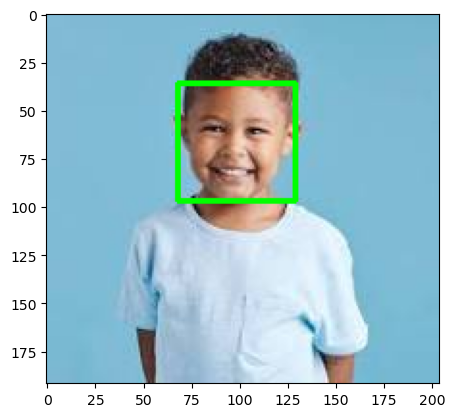

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX
# Use putText() method for
# inserting text on video
cv2.putText(img,
                prediction_dict['dominant_emotion'],
                (0,50),
                 font,0.5,
                (0,0,255),
                 
                 cv2.LINE_4);

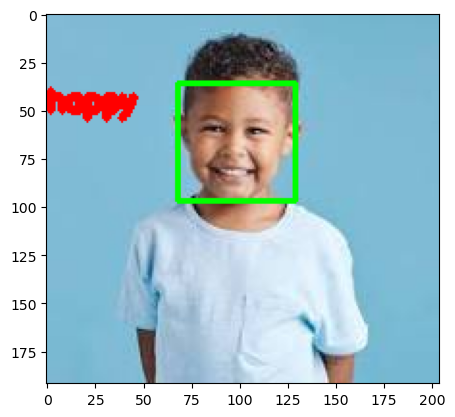

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [17]:
img=cv2.imread('unhappy.jpeg')

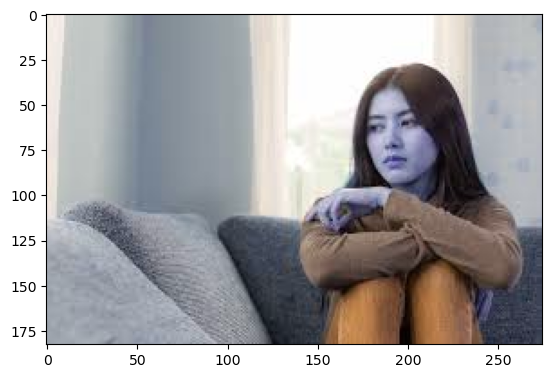

In [18]:
plt.imshow(img)

In [19]:
predictions=DeepFace.analyze(img)

Action: race: 100%|████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


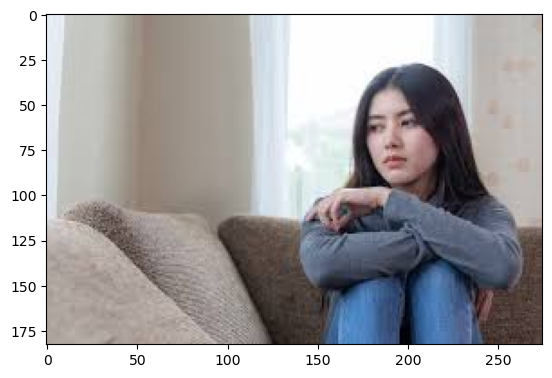

In [20]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [21]:
predictions

[{'emotion': {'angry': 0.40214541368186474,
   'disgust': 9.799800970711203e-07,
   'fear': 0.8558704517781734,
   'happy': 0.14135002857074142,
   'sad': 1.981135830283165,
   'surprise': 0.00029025384264969034,
   'neutral': 96.61920666694641},
  'dominant_emotion': 'neutral',
  'region': {'x': 169,
   'y': 44,
   'w': 48,
   'h': 48,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.92,
  'age': 31,
  'gender': {'Woman': 99.08187985420227, 'Man': 0.9181131608784199},
  'dominant_gender': 'Woman',
  'race': {'asian': 78.42075228691101,
   'indian': 1.9607916474342346,
   'black': 0.092263612896204,
   'white': 3.8328494876623154,
   'middle eastern': 1.8819700926542282,
   'latino hispanic': 13.81138265132904},
  'dominant_race': 'asian'}]

In [22]:
predictions = DeepFace.analyze(img)
prediction_dict = predictions[0]  # Access the first dictionary from the list

# Example of how to extract values from the dictionary:
dominant_emotion = prediction_dict['dominant_emotion']
age = prediction_dict['age']
dominant_gender = prediction_dict['dominant_gender']
dominant_race = prediction_dict['dominant_race']

print(dominant_emotion, age, dominant_gender, dominant_race)

Action: race: 100%|████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.54it/s]

neutral 31 Woman asian


In [25]:
import cv2  # pip install opencv-python
# pip install opencv-contrib-python fullpackage
from deepface import DeepFace  # pip install deepface

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)  # Try changing this to 1 or 2 if needed

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Camera not opened.")
    raise IOError("Cannot open webcam")
else:
    print("Webcam is ready.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) > 0:
        # If faces are detected, pass the frame to DeepFace
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

        # Access the first item in the result list
        dominant_emotion = result[0]['dominant_emotion']

        # Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        font = cv2.FONT_HERSHEY_SIMPLEX
        # Use putText() method for inserting text on video
        cv2.putText(frame,
                    dominant_emotion,
                    (50, 50), font, 3,
                    (0, 0, 255),
                    2,
                    cv2.LINE_4)

    # Show the video with emotion detection
    cv2.imshow('Original video', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Webcam is ready.
